In [249]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px
import itertools

import warnings
warnings.filterwarnings('ignore')

In [250]:
import sys
sys.path.insert(0, '../../_functions_')

from functions_eda import *

## First dataset - Babies born in Barcelona over the years

In [251]:
babies = pd.read_csv('../BC_Final_Project/datasets/BD_Final Project - nascuts_vius_BCN.csv')

In [252]:
babies.info()
# the values are all integers, so this is what I need.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    49 non-null     int64
 1   Boys    49 non-null     int64
 2   Girls   49 non-null     int64
 3   Total   49 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [253]:
babies.head()

,Year,Boys,Girls,Total
0,2023,5874,5504,11378
1,2022,6090,5511,11601
2,2021,6135,5840,11975
3,2020,6312,5967,12279
4,2019,6626,6273,12899


In [254]:
# Checking the shape of the dataframe
babies.shape

(49, 4)

In [255]:
# There aren't any NaN values
babies.isnull().sum()

Year     0
Boys     0
Girls    0
Total    0
dtype: int64

## 1 - First I want to see the evolution of babies born in Barcelona through the years.

In [256]:
# With the total variable
# Step 1: Create the traces of the plots
fig = px.line(babies, 
              x = "Year", 
              y=["Boys", "Girls", 'Total']
             )

# Update the layout of the plot with a title
fig.update_layout(title_text='Births in Barcelona City Over the Years',
                  title_x=0.5,  # Centers the title
                  xaxis_title='Years',
                  yaxis_title='Babies Born',
                  legend_title='Gender',
                  width=800,  # Set the width of the plot (increase for wider)
                  height=600   # Set the height of the plot (increase for taller)
                 )

# Ensure every year is displayed on the x-axis
fig.update_xaxes(
    dtick=5,  # Forces tick marks to appear every 1 year
    tickmode="auto",
    showgrid=False)

# Make the y-axis more detailed
fig.update_yaxes(
    dtick=5000, # Adjusts tick marks to show every 3,000 births
    tickformat=",",  # Adds comma formatting to large numbers
    showgrid=True  # Optional: shows grid lines for better readability
)

# Step 2: Show the plot
fig.show()

## 2 - Second I'll present this data into more detail, just out of curiosity: boys vs girls 
(This will depend how many slides I already have in the presentation, I don't think this will be very important)

In [257]:
# Without the total variable
# Create the traces of the plots
fig = px.line(babies, 
              x = "Year", 
              y=["Boys", "Girls"],
             ) 


# Update the layout of the plot with a title
fig.update_layout(title_text='Boys and Girls Births Over the Years',
                  title_x=0.5,  # Centers the title
                 xaxis_title='Years',
                 yaxis_title='# Babies Born',
                 legend_title='Gender',
                 width=1000,  # Set the width of the plot (increase for wider)
                 height=400   # Set the height of the plot (increase for taller)
                 )

# Ensure every year is displayed on the x-axis
fig.update_xaxes(
    dtick=1,  # Forces tick marks to appear every 1 year
    tickmode="linear",
    showgrid=False)

# Make the y-axis more detailed
fig.update_yaxes(
    dtick=1000, # Adjusts tick marks to show every 1,000 births
    tickformat=",",  # Adds comma formatting to large numbers
    showgrid=True  # Optional: shows grid lines for better readability
)

# Show the plot
fig.show()

## Second dataset - Public and Private Schools and Professors

In [258]:
centers = pd.read_csv('../BC_Final_Project/datasets/BD_Final Project - Centres_Professors_infantil_primaria.csv')

In [259]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Curs                15 non-null     object
 1   Centres_Públics     15 non-null     int64 
 2   Centres_Privats     15 non-null     int64 
 3   Centres_Total       15 non-null     int64 
 4   Professors_Públics  15 non-null     int64 
 5   Professors_Privats  15 non-null     int64 
 6   Professors_Total    15 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 972.0+ bytes


In [260]:
centers.head()

,Curs,Centres_Públics,Centres_Privats,Centres_Total,Professors_Públics,Professors_Privats,Professors_Total
0,2022/2023,408,440,848,8904,7793,16697
1,2021/2022,401,448,849,8641,7902,16543
2,2020/2021,400,468,868,8197,8297,16494
3,2019/2020,392,487,879,8126,8482,16608
4,2018/2019,389,488,877,8111,8572,16683


In [261]:
centers.shape

(15, 7)

In [262]:
centers.isnull().sum()

Curs                  0
Centres_Públics       0
Centres_Privats       0
Centres_Total         0
Professors_Públics    0
Professors_Privats    0
Professors_Total      0
dtype: int64

In [263]:
centers.nunique()

Curs                  15
Centres_Públics       11
Centres_Privats       14
Centres_Total         13
Professors_Públics    15
Professors_Privats    15
Professors_Total      15
dtype: int64

In [264]:
centers.tail()

,Curs,Centres_Públics,Centres_Privats,Centres_Total,Professors_Públics,Professors_Privats,Professors_Total
10,2012/2013,382,462,844,7134,8119,15253
11,2011/2012,379,473,852,7388,8313,15701
12,2010/2011,347,465,812,7196,8252,15448
13,2009/2010,341,473,814,7033,8377,15410
14,2008/2009,331,471,802,7041,8360,15401


In [265]:
centers['Centres_Públics'].unique()

array([408, 401, 400, 392, 389, 386, 382, 379, 347, 341, 331])

In [266]:
centers['Centres_Privats'].unique()

array([440, 448, 468, 487, 488, 486, 490, 491, 507, 445, 462, 473, 465,
       471])

In [267]:
centers['Centres_Total'].unique()

array([848, 849, 868, 879, 877, 875, 893, 831, 844, 852, 812, 814, 802])

In [268]:
centers.rename(columns={"Centres_Públics":"Centres_Publics", "Professors_Públics": "Professors_Publics"}, inplace=True)

In [269]:
centers.columns

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total',
       'Professors_Publics', 'Professors_Privats', 'Professors_Total'],
      dtype='object')

## 3 - Create a bar chart comparing the number of public and private schools over the years. Since 2008, when more children were born, until 2023, the last data available

In [270]:
# Step 1: Create the traces of the plots
fig = px.bar(centers, 
             x = 'Curs', 
             y = ['Centres_Publics', 'Centres_Privats'], 
             labels={'Curs': 'School Term', 'Centres_Publics': 'Public Centers', 'Centres_Privats': 'Private Centers'},
             text_auto=True, # Add text labels automatically)
             category_orders={'Curs': sorted(centers['Curs'].unique(), key=lambda x: str(x))}  # Sort x-axis in ascending order
            )  

# Step 2: Update legend names manually
fig.for_each_trace(lambda t: t.update(name={'Centres_Publics': 'Public Centers', 
                                            'Centres_Privats': 'Private Centers'}[t.name]))

# Step 3: Adjust text position and angle
fig.update_traces(textangle=50,  # Rotate text 50º
                  textposition="outside")  # Ensure text is visible above bars

# Step 4: Update the layout of the plot
fig.update_layout(title_text='# Public vs Privat Schools',
                  title_x=0.5,  # Centers the title
                  xaxis_title='School Term',
                  yaxis_title='Number of Centers',
                  legend_title='Type of School',
                  width=800,  # Set the width of the plot (increase for wider)
                  height=600,
                  barmode='group') # display multiple bars for each category side by side

# Step 5: Show the plot
fig.show()

In [271]:
centers_1 = centers

In [272]:
centers_1.columns

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total',
       'Professors_Publics', 'Professors_Privats', 'Professors_Total'],
      dtype='object')

In [273]:
centers_1 = centers_1.drop(columns=['Professors_Publics', 'Professors_Privats', 'Professors_Total'])

In [274]:
centers_1.columns

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total'], dtype='object')

In [275]:
#1 Calculate Year-on-Year Change (Growth)
centers_1['Publics_Growth'] = centers_1['Centres_Publics'].pct_change() * 100 # percentage change
centers_1['Privats_Growth'] = centers_1['Centres_Privats'].pct_change() * 100 # percent change
centers_1['Total_Growth'] = centers_1['Centres_Total'].pct_change() * 100 # percent change

In [276]:
#2 Calculate Percentage Share of Publics and Privates
centers_1['Public_Percentage'] = (centers_1['Centres_Publics'] / centers_1['Centres_Total']) * 100
centers_1['Private_Percentage'] = (centers_1['Centres_Privats'] / centers_1['Centres_Total']) * 100

In [277]:
centers_1 = centers_1.round({'Publics_Growth': 2,
                        'Privats_Growth': 2,
                        'Total_Growth':2,
                        'Public_Percentage': 2,
                        'Private_Percentage': 2})

In [278]:
centers_1

,Curs,Centres_Publics,Centres_Privats,Centres_Total,Publics_Growth,Privats_Growth,Total_Growth,Public_Percentage,Private_Percentage
0,2022/2023,408,440,848,NaN,NaN,NaN,48.11,51.89
1,2021/2022,401,448,849,-1.72,1.82,0.12,47.23,52.77
2,2020/2021,400,468,868,-0.25,4.46,2.24,46.08,53.92
3,2019/2020,392,487,879,-2.00,4.06,1.27,44.60,55.40
4,2018/2019,389,488,877,-0.77,0.21,-0.23,44.36,55.64
5,2017/2018,389,486,875,0.00,-0.41,-0.23,44.46,55.54
6,2016/2017,389,490,879,0.00,0.82,0.46,44.25,55.75
7,2015/2016,386,491,877,-0.77,0.20,-0.23,44.01,55.99
8,2014/2015,386,507,893,0.00,3.26,1.82,43.23,56.77
9,2013/2014,386,445,831,0.00,-12.23,-6.94,46.45,53.55


In [279]:
sorted_years = sorted(centers_1['Curs'].astype(str).unique())

In [280]:
# Plotting 1: Year-on-Year Growth
fig1 = px.line(centers_1,
              x="Curs",
              y=["Publics_Growth", "Privats_Growth", "Total_Growth"],
              markers=True,
              title="Growth of Schools Over the Years",
               labels={"Publics_Growth": "Public Schools Growth (%)",
                      "Privats_Growth": "Private Schools Growth (%)",
                      "Total_Growth": "Total Growth (%)"},
              category_orders={'Curs': sorted_years})  # Sort x-axis in ascending order)

fig1.update_layout(
    xaxis_title="Year",
    yaxis_title="Growth (%)",
    width=1000,
    height=600
)

# Show the plot
fig1.show()

In [281]:
centers_1.sort_values(['Curs'], ascending = True, inplace = True, ignore_index = True)

In [282]:
print(centers_1.columns)

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total',
       'Publics_Growth', 'Privats_Growth', 'Total_Growth', 'Public_Percentage',
       'Private_Percentage'],
      dtype='object')


In [283]:
import plotly.graph_objects as go
import pandas as pd

# ✅ Convert dataset from wide to long format (if needed)
centers_long = centers_1.melt(id_vars=["Curs"], 
                            value_vars=["Public_Percentage", "Private_Percentage"], 
                            var_name="School_Type", 
                            value_name="Percentage")

# ✅ Mapping correct names
centers_long["School_Type"] = centers_long["School_Type"].replace({
    "Public_Percentage": "Public",
    "Private_Percentage": "Private"
})

# Create figure
fig = go.Figure()

# ✅ Create animation frames
frames = []
for year in centers_long["Curs"].unique():
    df_year = centers_long[centers_long["Curs"] == year]
    frame = go.Frame(
        data=[go.Pie(
            labels=df_year["School_Type"],  # ✅ Use correct column name
            values=df_year["Percentage"],  
            marker=dict(colors=["#636EFA", "#EF553B"])
        )],
        name=str(year),
        layout={"title": f"Percentage of Public vs. Private Schools in {year}"}
    )
    frames.append(frame)

# ✅ Add initial frame
df_first = centers_long[centers_long["Curs"] == centers_long["Curs"].min()]
fig.add_trace(go.Pie(
    labels=df_first["School_Type"],  
    values=df_first["Percentage"],  
    marker=dict(colors=["#636EFA", "#EF553B"])
))

# ✅ Update layout with animation settings
fig.update_layout(
    title=f"Percentage of Public vs. Private Schools in {centers_long['Curs'].min()}",
    width=700,  
    height=500,
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

# ✅ Add frames to the figure
fig.update(frames=frames)

# Show animated pie chart
fig.show()

## 4 - Create plots comparing the number of public and private teachers over the years --> Since 2008, when more children were born, until 2023, the last data available.

In [284]:
centers.head()

,Curs,Centres_Publics,Centres_Privats,Centres_Total,Professors_Publics,Professors_Privats,Professors_Total
0,2022/2023,408,440,848,8904,7793,16697
1,2021/2022,401,448,849,8641,7902,16543
2,2020/2021,400,468,868,8197,8297,16494
3,2019/2020,392,487,879,8126,8482,16608
4,2018/2019,389,488,877,8111,8572,16683


In [285]:
print(centers.columns)

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total',
       'Professors_Publics', 'Professors_Privats', 'Professors_Total'],
      dtype='object')


In [286]:
teachers = centers

In [287]:
teachers.columns

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total',
       'Professors_Publics', 'Professors_Privats', 'Professors_Total'],
      dtype='object')

In [288]:
teachers = teachers.drop(columns=['Centres_Publics', 'Centres_Privats', 'Centres_Total'])

In [289]:
teachers

,Curs,Professors_Publics,Professors_Privats,Professors_Total
0,2022/2023,8904,7793,16697
1,2021/2022,8641,7902,16543
2,2020/2021,8197,8297,16494
3,2019/2020,8126,8482,16608
4,2018/2019,8111,8572,16683
5,2017/2018,7965,8621,16586
6,2016/2017,7571,8350,15921
7,2015/2016,7595,8337,15932
8,2014/2015,7291,8260,15551
9,2013/2014,7302,8234,15536


In [290]:
# Step 1: Create the traces of the plots
fig = px.bar(teachers, 
             x = 'Curs', 
             y = ['Professors_Publics', 'Professors_Privats'], 
             labels={'Curs': 'School Term', 'Professors_Publics': 'Public Teachers', 'Professors_Privats': 'Private Teachers'},
             text_auto=True, # Add text labels automatically)
             category_orders={'Curs': sorted(centers['Curs'].unique(), key=lambda x: str(x))}  # Sort x-axis in ascending order
            )  

# Step 2: Update legend names manually
fig.for_each_trace(lambda t: t.update(name={'Professors_Publics': 'Public', 
                                            'Professors_Privats': 'Private'}[t.name]))

# Step 3: Adjust text position and angle
fig.update_traces(textangle=50,  # Rotate text 50º
                  textposition="outside")  # Ensure text is visible above bars

# Step 4: Update the layout of the plot
fig.update_layout(title_text='# Public vs Privat Teachers',
                  title_x=0.5,  # Centers the title
                  xaxis_title='School Term',
                  yaxis_title='Number of Teachers',
                  legend_title='Type of Teacher',
                  width=1000,  # Set the width of the plot (increase for wider)
                  height=625,
                  barmode='group') # display multiple bars for each category side by side

# Step 5: Show the plot
fig.show()

In [291]:
#1 Calculate Year-on-Year Change (Growth)
teachers['Publics_Growth'] = teachers['Professors_Publics'].pct_change() * 100 # percentage change
teachers['Privats_Growth'] = teachers['Professors_Privats'].pct_change() * 100 # percent change
teachers['Total_Growth'] = teachers['Professors_Total'].pct_change() * 100 # percent change

In [292]:
#2 Calculate Percentage Share of Publics and Privates
teachers['Public_Percentage'] = (teachers['Professors_Publics'] / teachers['Professors_Total']) * 100
teachers['Private_Percentage'] = (teachers['Professors_Privats'] / teachers['Professors_Total']) * 100

In [293]:
#3 Convert 'Curs' to string for proper sorting
sorted_years = sorted(teachers['Curs'].astype(str).unique())

In [294]:
teachers.head(10)

,Curs,Professors_Publics,Professors_Privats,Professors_Total,Publics_Growth,Privats_Growth,Total_Growth,Public_Percentage,Private_Percentage
0,2022/2023,8904,7793,16697,NaN,NaN,NaN,53.326945,46.673055
1,2021/2022,8641,7902,16543,-2.953729,1.398691,-0.922321,52.233573,47.766427
2,2020/2021,8197,8297,16494,-5.138294,4.998734,-0.296198,49.696859,50.303141
3,2019/2020,8126,8482,16608,-0.866171,2.229722,0.691160,48.928227,51.071773
4,2018/2019,8111,8572,16683,-0.184593,1.061071,0.451590,48.618354,51.381646
5,2017/2018,7965,8621,16586,-1.800025,0.571629,-0.581430,48.022429,51.977571
6,2016/2017,7571,8350,15921,-4.946642,-3.143487,-4.009406,47.553546,52.446454
7,2015/2016,7595,8337,15932,0.316999,-0.155689,0.069091,47.671353,52.328647
8,2014/2015,7291,8260,15551,-4.002633,-0.923594,-2.391414,46.884445,53.115555
9,2013/2014,7302,8234,15536,0.150871,-0.314770,-0.096457,47.000515,52.999485


In [295]:
teachers = teachers.round({'Publics_Growth': 2,
                        'Privats_Growth': 2,
                        'Total_Growth':2,
                        'Public_Percentage': 2,
                        'Private_Percentage': 2})

In [296]:
teachers.head(10)

,Curs,Professors_Publics,Professors_Privats,Professors_Total,Publics_Growth,Privats_Growth,Total_Growth,Public_Percentage,Private_Percentage
0,2022/2023,8904,7793,16697,NaN,NaN,NaN,53.33,46.67
1,2021/2022,8641,7902,16543,-2.95,1.40,-0.92,52.23,47.77
2,2020/2021,8197,8297,16494,-5.14,5.00,-0.30,49.70,50.30
3,2019/2020,8126,8482,16608,-0.87,2.23,0.69,48.93,51.07
4,2018/2019,8111,8572,16683,-0.18,1.06,0.45,48.62,51.38
5,2017/2018,7965,8621,16586,-1.80,0.57,-0.58,48.02,51.98
6,2016/2017,7571,8350,15921,-4.95,-3.14,-4.01,47.55,52.45
7,2015/2016,7595,8337,15932,0.32,-0.16,0.07,47.67,52.33
8,2014/2015,7291,8260,15551,-4.00,-0.92,-2.39,46.88,53.12
9,2013/2014,7302,8234,15536,0.15,-0.31,-0.10,47.00,53.00


## Detailed Breakdown of Visualizations:

1.	Year-on-Year Growth:
    -	We calculate the percentage growth of public, private, and total professors for each year. This will show how each category has changed in terms of growth rate.
    -	Plot: Line plot showing the growth percentage over the years.

In [297]:
# Plotting 1: Year-on-Year Growth
fig1 = px.line(teachers,
              x="Curs",
              y=["Publics_Growth", "Privats_Growth", "Total_Growth"],
              markers=True,
              title="Growth of Teachers Over the Years",
               labels={"Publics_Growth": "Public Teachers Growth (%)",
                      "Privats_Growth": "Private Teachers Growth (%)",
                      "Total_Growth": "Total Growth (%)"},
              category_orders={'Curs': sorted_years})  # Sort x-axis in ascending order)

fig1.update_layout(
    xaxis_title="Year",
    yaxis_title="Growth (%)",
    width=1000,
    height=600
)

# Show the plot
fig1.show()

2.	Percentage Share of Public vs. Private Professors:
	-	For each year, we calculate the percentage of public and private professors as part of the total number of professors.
	-	Plot: Line plot comparing the percentage share of public and private professors.

Related news: https://www.edubcn.cat/es/noticias/detalle?59955 - some schools changed from private to public, and as a result, the status of teachers also changed:
"Desde el curso 2020-2021 seis centros concertados se han incorporado a la red pública de la ciudad. El primero fue el colegio Inmaculada Concepción (Institut Escola Eixample), y el curso 2021-2022 lo hicieron 4 escuelas de la Fundación Escola Vicenciana; actuament instituto escuela Sicilia (Eixample), instituto escuela Londres (Eixample), escuela Aldana (Eixample), instituto escuela Elisabets (Ciutat Vella). Y este curso también la ya mencionada escuela Projecte de Sarrià-Gervasi, que pasará a ser el instituto escuela Projecte."

In [298]:
# Plotting 2: Percentage Share of Public and Private Professors
fig2 = px.line(teachers, 
               x="Curs", 
               y=["Public_Percentage", "Private_Percentage"],
               markers=True,
               title="Percentage of Public vs. Private Teachers",
               labels={"Public_Percentage": "Public (%)", 
                       "Private_Percentage": "Private (%)"},
              category_orders={'Curs': sorted_years})  # Sort x-axis in ascending order)

fig2.update_layout(
    xaxis_title="Year",
    yaxis_title="Percentage (%)",
    width=1000,
    height=600
)

# Show the plot
fig2.show()

3.	Growth Comparison Between Public and Private Professors:

	-	We compare the absolute number of public and private professors for each year, with the size of the points reflecting the total number of professors.
	-	Plot: Scatter plot showing the relationship between public and private professors with a size scale based on the total professors in each year.

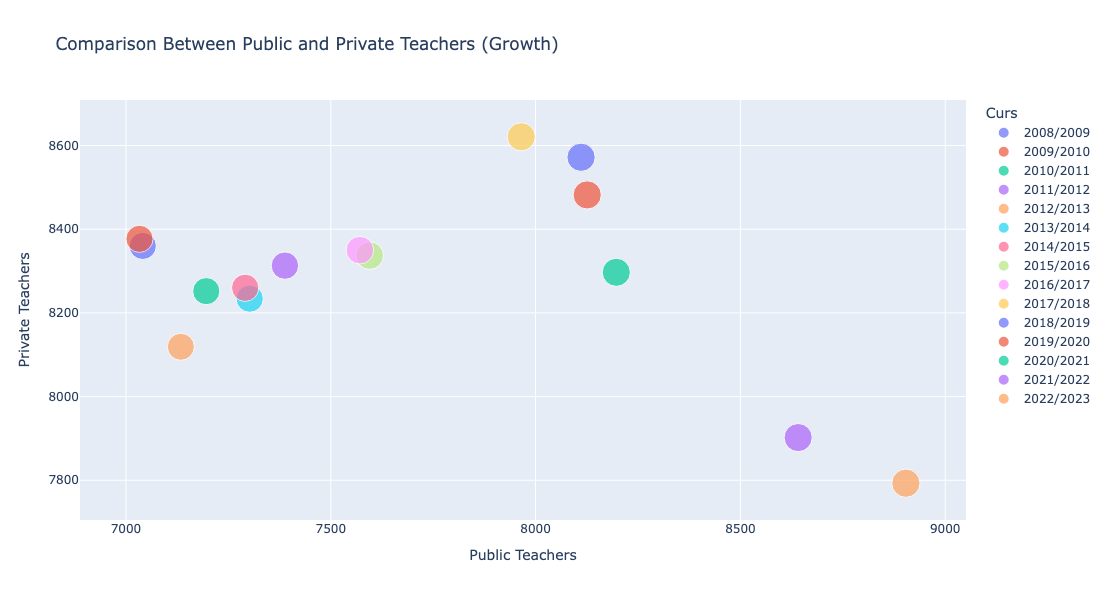

In [299]:
# Plotting 3: Professor Growth Comparison (Public vs. Private)
fig3 = px.scatter(teachers, 
                  x="Professors_Publics", 
                  y="Professors_Privats", 
                  color="Curs",  # Use a continuous color scale 
                  size="Professors_Total", 
                  color_continuous_scale="Viridis",  # Choose a color gradient
                  title="Comparison Between Public and Private Teachers (Growth)",
                  labels={"Professors_Publics": "Public Teachers", 
                          "Professors_Privats": "Private Teachers", 
                          "Professors_Total": "Total Teachers"},
                 category_orders={'Curs': sorted_years} # Sort x-axis in ascending order)
                # color_discrete_sequence=px.colors.qualitative.Safe  # Change color palette
                                  )

fig3.update_layout(
    xaxis_title="Public Teachers",
    yaxis_title="Private Teachers",
    width=1000,
    height=600
)

# Show the plot
fig3.show()

Insights:

-	Growth Trends: See if public or private professors are growing faster or if there are years with sharp declines.
-	Share Comparison: Analyze how the percentage of public vs. private professors has changed over time.
-	Growth Comparison: Compare the raw numbers of public and private professors in each year, highlighting any significant shifts in balance between the two categories.

Rita's comments: I don't think this scatter plot is useful... Maybe I should change to another plot? Maybe a bubbleplot?

Asia's comments:


## Third dataset - Offer of places in kindergarten (P3) in the city of Barcelona

In [300]:
places = pd.read_csv('../BC_Final_Project/datasets/Oferta_places_infantil_BCN.csv')

In [301]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Curs                                 2307 non-null   object
 1   Codi centre                          2307 non-null   int64 
 2   Denominació completa                 2307 non-null   object
 3   Nom naturalesa                       2307 non-null   object
 4   Nom titularitat                      2307 non-null   object
 5   Codi districte municipal             2307 non-null   int64 
 6   Nom DM                               2307 non-null   object
 7   Nom ensenyament                      2307 non-null   object
 8   Nivell                               2307 non-null   int64 
 9   Nombre grups                         2307 non-null   int64 
 10  Nombre places                        2307 non-null   int64 
 11  Places ofertades a la preinscripció  2307 n

In [302]:
places.head(10)

,Curs,Codi centre,Denominació completa,Nom naturalesa,Nom titularitat,Codi districte municipal,Nom DM,Nom ensenyament,Nivell,Nombre grups,Nombre places,Places ofertades a la preinscripció,Assignacions,Assignacions: 1a peticio,Assignacions: Altres peticions
0,2023/2024,8001595,Escola Baixeras,Públic,Departament d'Educació,1,Ciutat vella,Educació infantil: Parvulari,1,1,21,21,20,16,4
1,2023/2024,8001601,Escola Parc de la Ciutadella,Públic,Departament d'Educació,1,Ciutat vella,Educació infantil: Parvulari,1,1,21,21,17,10,7
2,2023/2024,8001649,Escola Mossèn Jacint Verdaguer,Públic,Departament d'Educació,3,Sants - Montjuïc,Educació infantil: Parvulari,1,2,40,40,40,33,7
3,2023/2024,8001650,Escola El Polvorí,Públic,Departament d'Educació,3,Sants - Montjuïc,Educació infantil: Parvulari,1,1,20,20,10,8,2
4,2023/2024,8001674,Escola Can Clos,Públic,Departament d'Educació,3,Sants - Montjuïc,Educació infantil: Parvulari,1,1,20,20,11,6,5
5,2023/2024,8001716,Escola Dolors Monserdà-Santapau,Públic,Departament d'Educació,5,Sarrià - Sant Gervasi,Educació infantil: Parvulari,1,2,40,40,37,35,2
6,2023/2024,8001731,Escola Poeta Foix,Públic,Departament d'Educació,5,Sarrià - Sant Gervasi,Educació infantil: Parvulari,1,1,23,23,23,20,3
7,2023/2024,8001777,Escola Ramon Llull,Públic,Departament d'Educació,2,Eixample,Educació infantil: Parvulari,1,2,40,40,40,31,9
8,2023/2024,8001789,Escola Cervantes,Públic,Departament d'Educació,1,Ciutat vella,Educació infantil: Parvulari,1,1,21,21,21,20,1
9,2023/2024,8001790,Escola Pere Vila,Públic,Departament d'Educació,1,Ciutat vella,Educació infantil: Parvulari,1,2,42,42,40,34,6


In [303]:
places.columns

Index(['Curs', 'Codi centre', 'Denominació completa', 'Nom naturalesa',
       'Nom titularitat', 'Codi districte municipal', 'Nom DM',
       'Nom ensenyament', 'Nivell', 'Nombre grups', 'Nombre places',
       'Places ofertades a la preinscripció', 'Assignacions',
       'Assignacions: 1a peticio', 'Assignacions: Altres peticions'],
      dtype='object')

In [304]:
places.sort_values(['Curs'], ascending = True, inplace = True, ignore_index = True)

In [305]:
places

,Curs,Codi centre,Denominació completa,Nom naturalesa,Nom titularitat,Codi districte municipal,Nom DM,Nom ensenyament,Nivell,Nombre grups,Nombre places,Places ofertades a la preinscripció,Assignacions,Assignacions: 1a peticio,Assignacions: Altres peticions
0,2017/2018,8075700,Escola Eixample 1,Públic,Departament d'Educació,2,Eixample,Educació infantil: Parvulari,1,2,50,50,49,47,2
1,2017/2018,8004717,Sagrat Cor-Sarrià,Privat,Fundacions,5,Sarrià - Sant Gervasi,Educació infantil: Parvulari,1,4,100,100,97,94,3
2,2017/2018,8004742,Jesús i Maria,Privat,Ordes i Congregacions Catòlics,5,Sarrià - Sant Gervasi,Educació infantil: Parvulari,1,3,75,75,47,44,3
3,2017/2018,8004778,Santa Dorotea,Privat,Ordes i Congregacions Catòlics,5,Sarrià - Sant Gervasi,Educació infantil: Parvulari,1,2,50,50,47,44,3
4,2017/2018,8004869,Peter Pan,Privat,Fundacions,5,Sarrià - Sant Gervasi,Educació infantil: Parvulari,1,1,25,25,25,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,2023/2024,8035431,Escola Bogatell,Públic,Departament d'Educació,10,Sant Martí,Educació infantil: Parvulari,1,2,40,40,40,25,15
2303,2023/2024,8035441,Escola Catalònia,Públic,Departament d'Educació,10,Sant Martí,Educació infantil: Parvulari,1,2,40,40,39,38,1
2304,2023/2024,8035453,Escola Tomàs Moro,Públic,Departament d'Educació,8,Nou Barris,Educació infantil: Parvulari,1,1,22,22,15,12,3
2305,2023/2024,8013408,Escola Barcelona,Públic,Departament d'Educació,4,Les Corts,Educació infantil: Parvulari,1,2,44,44,44,43,1


In [306]:
places['Places ofertades a la preinscripció'].value_counts()

Places ofertades a la preinscripció
25     588
50     581
22     144
44     139
20     125
40     120
75     109
21      78
100     65
52      54
46      51
42      45
23      38
24      27
26      23
49      15
125     15
63      11
66      11
60       8
150      5
74       5
19       4
88       4
69       3
80       3
39       3
45       3
51       3
38       3
17       2
92       2
120      2
6        2
12       2
115      1
15       1
43       1
41       1
1        1
27       1
77       1
84       1
78       1
36       1
99       1
32       1
9        1
96       1
Name: count, dtype: int64